In [1]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sfp_nsdsyn import *
import warnings
import itertools
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

# Settings

In [88]:
output_dir='/Volumes/server/Projects/sfp_nsd/derivatives'
results_dir = os.path.join(output_dir, 'sfp_model', 'results_2D', 'nsdsyn')
lr = 0.0005
max_epoch = 30000
dset='nsdsyn'
roi_list = ['V1','V2','V3']
vsc='pRFsize'
subj_list = [utils.sub_number_to_string(sn, 'nsdsyn') for sn in np.arange(1,9)]
args = ['lr','eph','sub','roi','dset']

# Loss history

In [18]:
f = []
for subj, roi in itertools.product(subj_list, roi_list):
    file_name = os.path.join(results_dir, f'loss-history_lr-{lr}_eph-{max_epoch}_dset-{dset}_sub-{subj}_roi-{roi}_vs-{vsc}.h5')
    f.append(os.path.join(results_dir, file_name))
df = tuning.load_history_files(f, *args)

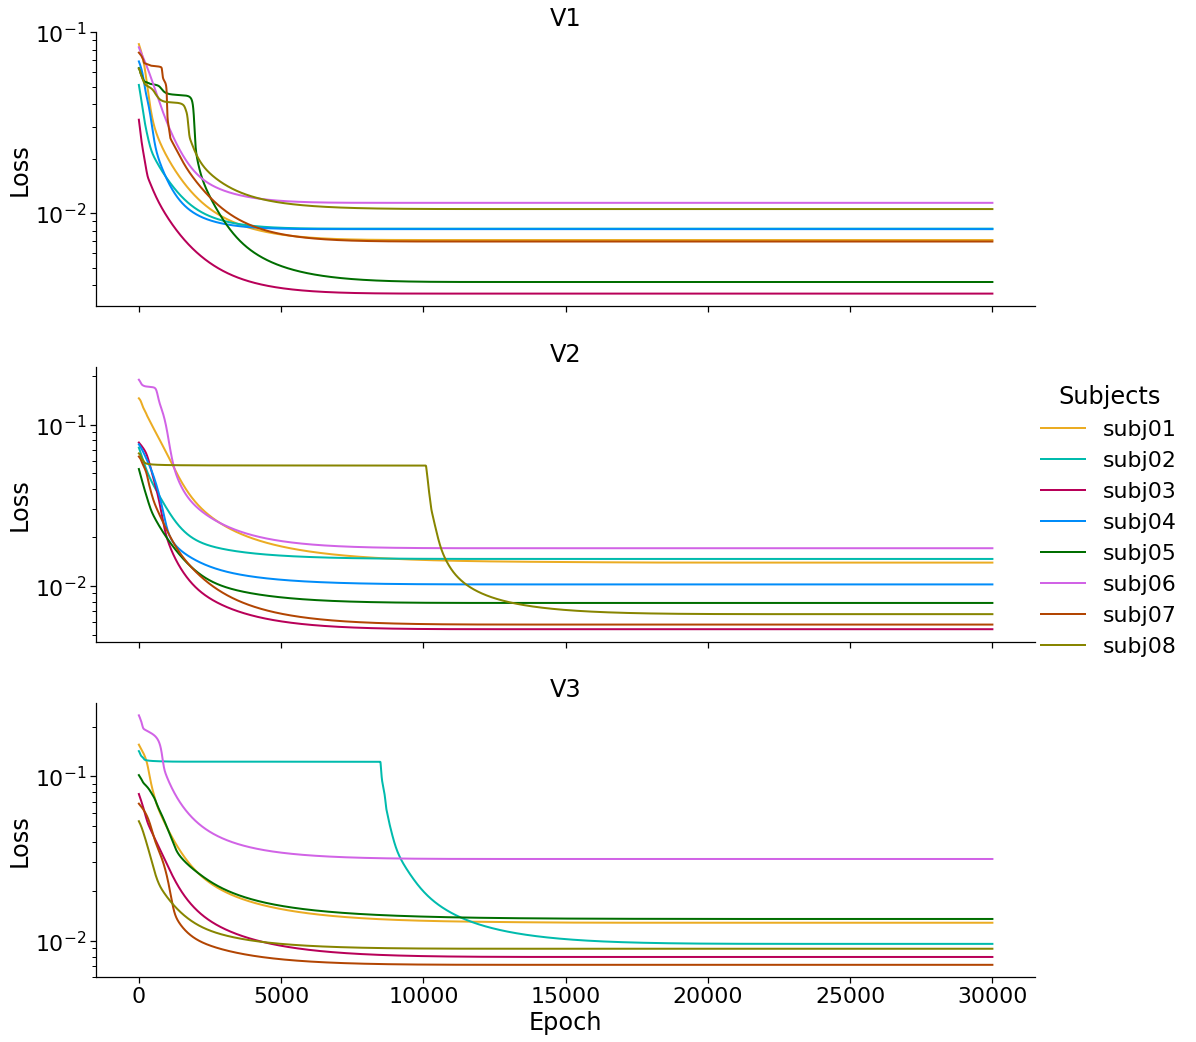

In [26]:
vis.plot_loss_history(df, hue='sub', lgd_title='Subjects', hue_order=subj_list,
                      col='vroinames', log_y=True,
                      **{'palette': utils.subject_color_palettes(dset, subj_list)})

# Model history

In [27]:
f = []
for subj, roi in itertools.product(subj_list, roi_list):
    file_name = os.path.join(results_dir, f'model-history_lr-{lr}_eph-{max_epoch}_dset-{dset}_sub-{subj}_roi-{roi}_vs-{vsc}.h5')
    f.append(os.path.join(results_dir, file_name))
model_df = tuning.load_history_files(f, *args)

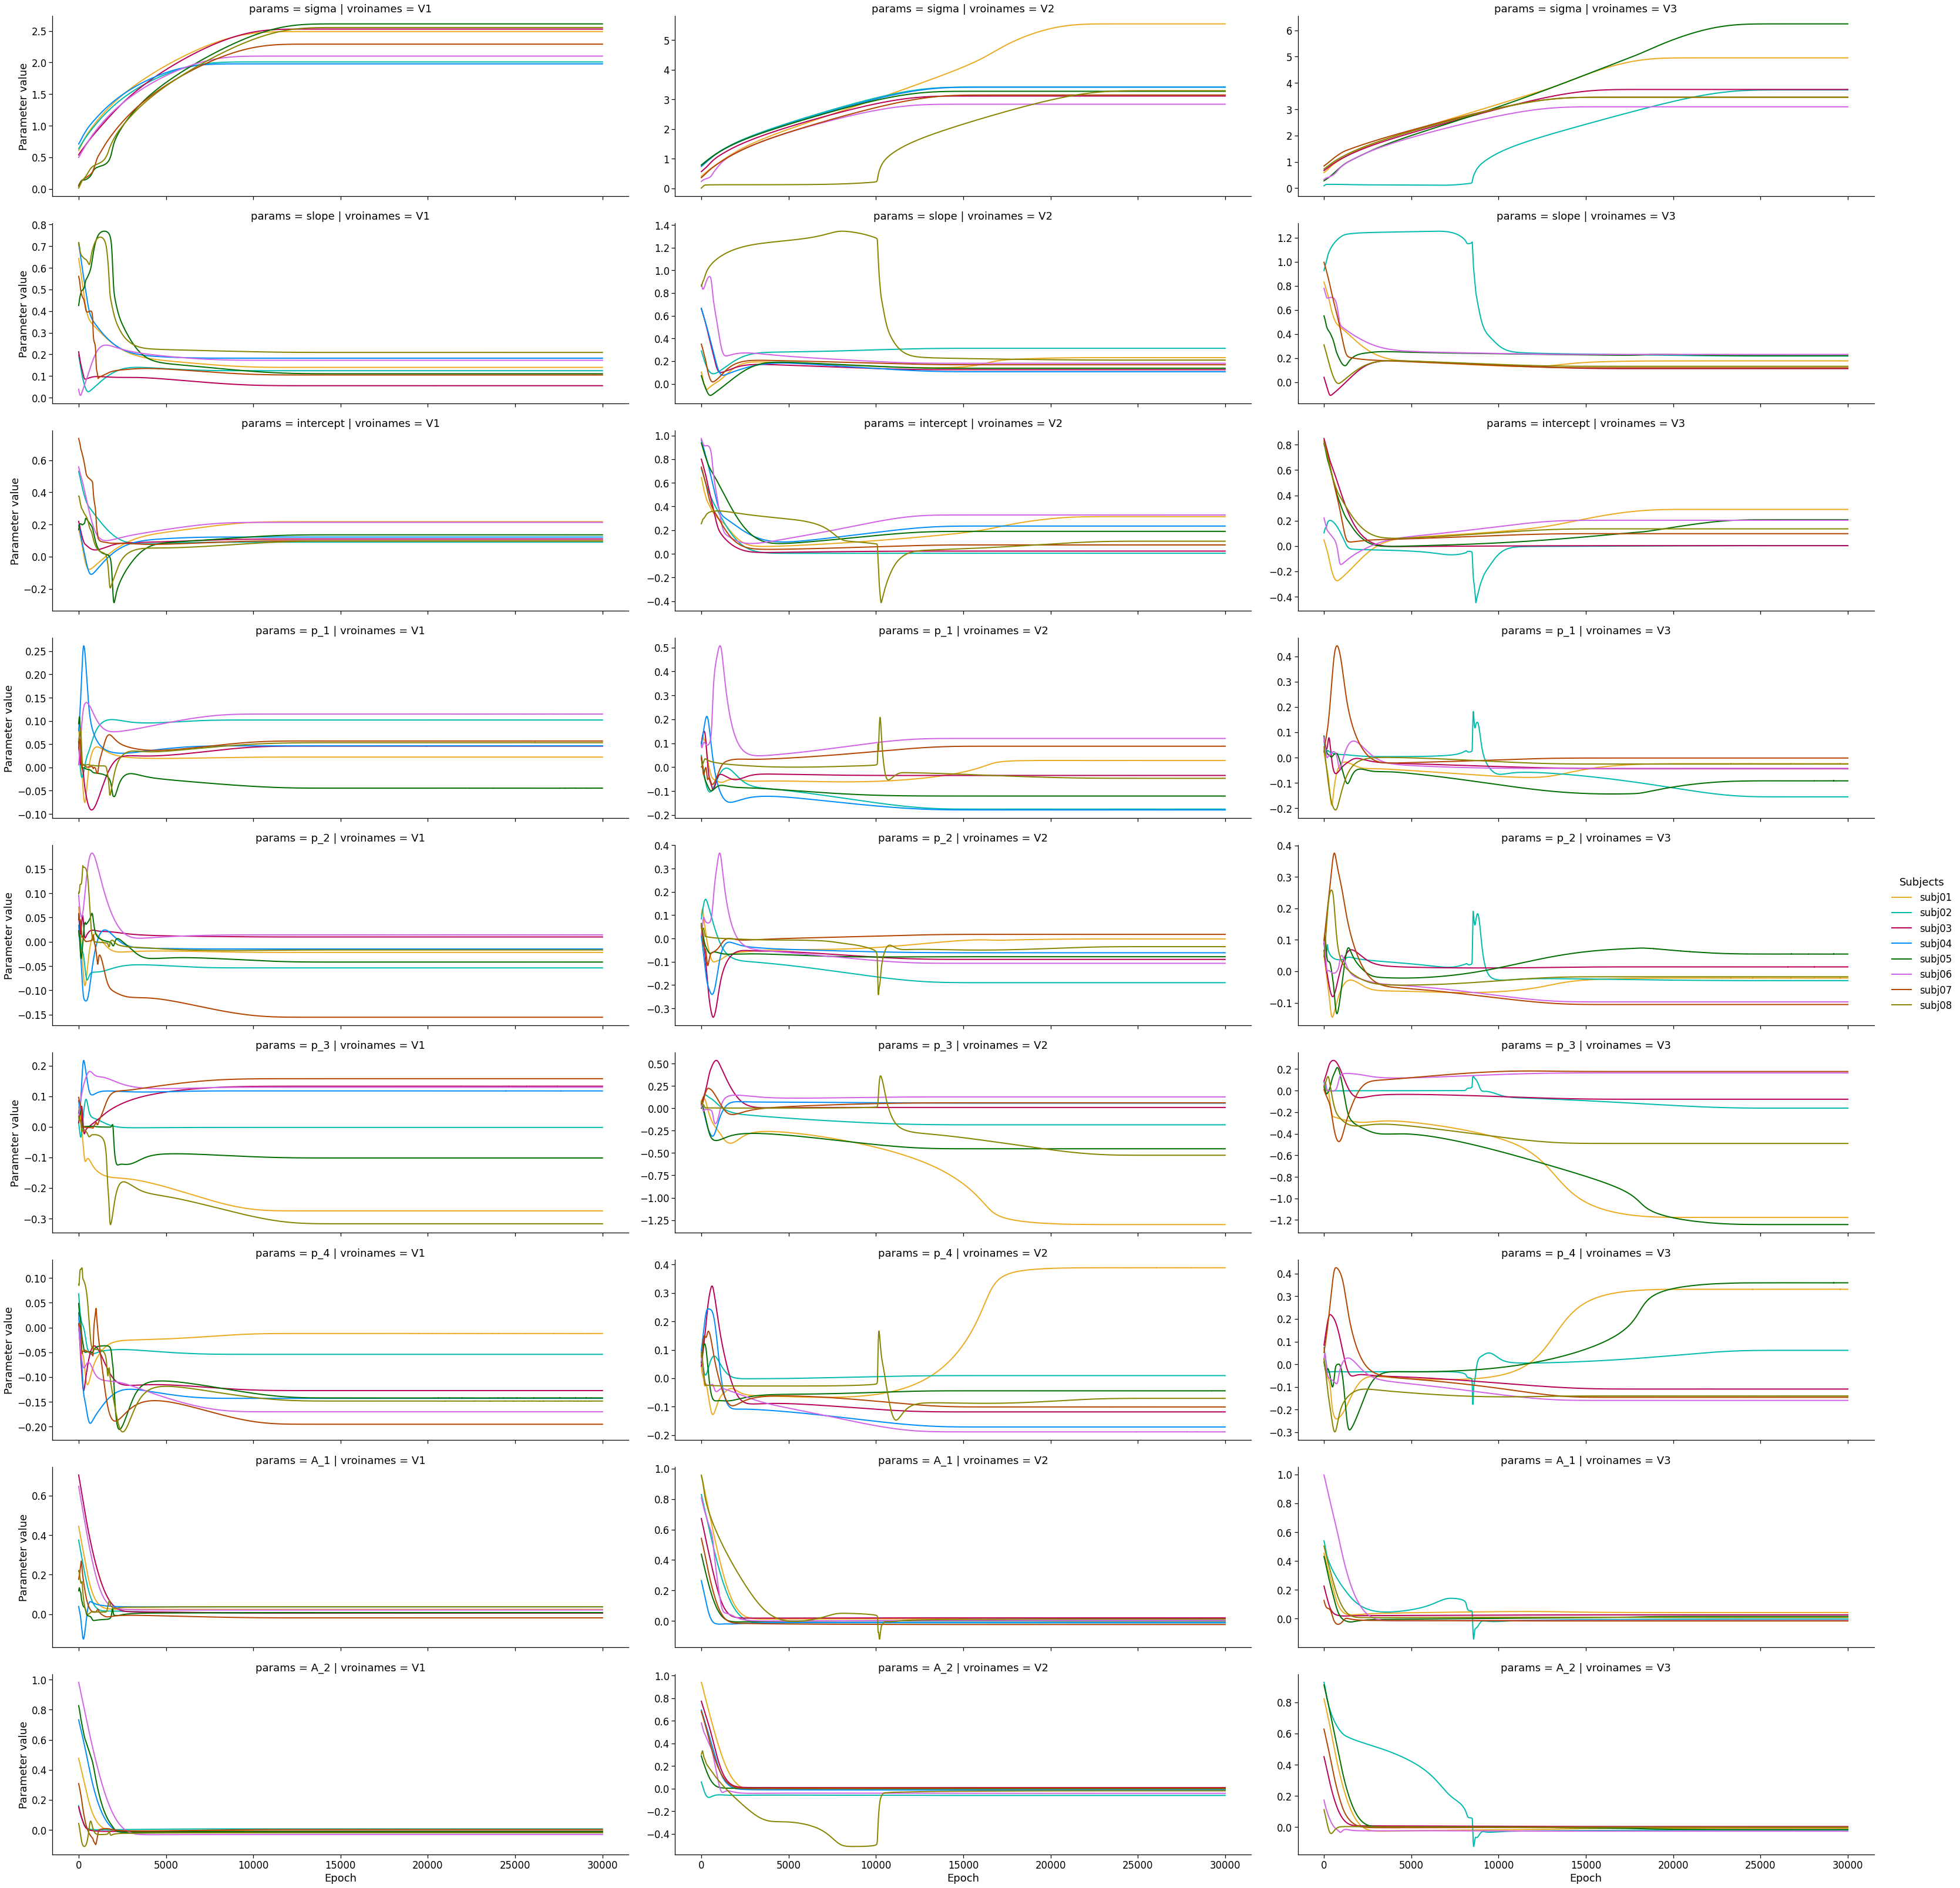

In [35]:
params_list = ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']
group = [1,2,2,3,3,4,4,5,5]
grid = vis.plot_param_history(model_df.query('vroinames == "V1"'), params_list, group,
                       hue='sub', lgd_title='Subjects', hue_order=subj_list,
                       **{'palette': utils.subject_color_palettes(dset, subj_list)})

# Dset comparison

In [90]:
broderick_file_list = []
broderick_sn_list = [1, 6, 7, 45, 46, 62, 64, 81, 95, 114, 115, 121]
broderick_subj_list = [utils.sub_number_to_string(i, 'broderick') for i in broderick_sn_list]
bd_file_list = []
for subj in broderick_subj_list:
    f = os.path.join('/Volumes/server/Projects/sfp_nsd/derivatives_old/sfp_model/results_2D', f'model_history_dset-broderick_bts-median_full_ver-True_sub-{subj}_lr-0.0005_eph-30000_V1.h5')
    bd_file_list.append(f)

In [91]:
bd_args = ['dset','sub']
bd_df = utils.load_history_files(bd_file_list, *bd_args)
bd_df['vroinames'] = 'V1'

In [92]:
final_bd_df = bd_df.query('epoch == 29999')

In [93]:
bd_file_list = []
for bd_subj in broderick_subj_list:
    f = os.path.join(output_dir, 'dataframes', 'broderick', 'precision', f'precision-v_dset-broderick_sub-{bd_subj}_roi-V1_vs-pRFsize.csv')
    bd_file_list.append(f)
bd_precision = utils.load_history_files(bd_file_list)

In [94]:
bd_precision

,sub,voxel,vroinames,sigma_v_squared
0,wlsubj001,0,V1,0.116537
1,wlsubj001,1,V1,0.053723
2,wlsubj001,2,V1,0.081875
3,wlsubj001,3,V1,0.037364
4,wlsubj001,4,V1,0.043800
...,...,...,...,...
3741,wlsubj121,4379,V1,0.200011
3742,wlsubj121,4380,V1,0.164156
3743,wlsubj121,4381,V1,0.240086
3744,wlsubj121,4382,V1,0.214089


In [95]:
bd_precision_s = bd_precision.groupby(['sub','vroinames'], group_keys=False).mean().reset_index()
bd_precision_s

,sub,vroinames,voxel,sigma_v_squared
0,wlsubj001,V1,1908.200303,0.096439
1,wlsubj006,V1,1800.349068,0.091271
2,wlsubj007,V1,1919.263028,0.263597
3,wlsubj045,V1,2477.644267,0.186538
4,wlsubj046,V1,2131.485154,0.187891
5,wlsubj062,V1,2252.426096,0.165124
6,wlsubj064,V1,2241.684834,0.235061
7,wlsubj081,V1,2954.677771,0.180827
8,wlsubj095,V1,1930.329709,0.166228
9,wlsubj114,V1,2997.187811,0.148255


In [96]:
final_bd_df = final_bd_df.merge(bd_precision_s[['sub','vroinames','sigma_v_squared']], on=['sub','vroinames'])
final_bd_df

,epoch,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,dset,sub,vroinames,sigma_v_squared
0,29999,2.984196,0.071027,0.400024,0.009960,-0.023560,0.005086,0.004069,0.031463,-0.007001,broderick,wlsubj001,V1,0.096439
1,29999,2.207649,0.192008,0.318536,0.072753,-0.027144,0.036718,-0.007561,0.047686,0.008027,broderick,wlsubj006,V1,0.091271
2,29999,1.859566,0.123812,0.328673,0.060503,-0.059433,0.160803,-0.005691,0.033455,0.018466,broderick,wlsubj007,V1,0.263597
3,29999,1.839831,0.137402,0.193707,0.066500,-0.050486,0.016282,-0.014123,0.080934,-0.027548,broderick,wlsubj045,V1,0.186538
4,29999,2.236669,0.101690,0.221754,0.039310,-0.023616,0.083696,0.022005,0.039015,-0.012657,broderick,wlsubj046,V1,0.187891
5,29999,2.115541,0.132440,0.323145,-0.033379,-0.018277,-0.122890,0.097172,0.064806,-0.021059,broderick,wlsubj062,V1,0.165124
6,29999,2.130340,0.136759,0.284252,0.091025,-0.036157,0.023343,0.001187,0.025593,0.001959,broderick,wlsubj064,V1,0.235061
7,29999,2.249078,0.079767,0.374599,0.044345,-0.077721,0.177016,0.003899,0.037286,0.005977,broderick,wlsubj081,V1,0.180827
8,29999,2.300413,0.121761,0.466371,0.125765,-0.021344,0.136857,-0.083407,-0.019852,0.014446,broderick,wlsubj095,V1,0.166228
9,29999,2.089035,0.128973,0.312971,0.111180,-0.003874,0.062324,-0.035700,0.094206,-0.024604,broderick,wlsubj114,V1,0.148255


In [97]:
pt_file_list = []
for subj, roi in itertools.product(subj_list, ['V1']):
    file_name = os.path.join(results_dir, f'model-params_lr-{lr}_eph-{max_epoch}_dset-{dset}_sub-{subj}_roi-{roi}_vs-{vsc}.pt')
    pt_file_list.append(os.path.join(results_dir, file_name))

In [98]:
df = model.load_all_models(pt_file_list, *args)

In [99]:
file_list = []
for subj in subj_list:
    f = os.path.join(output_dir, 'dataframes', dset, 'precision', f'precision-v_dset-{dset}_sub-{subj}_roi-V1_vs-pRFsize.csv')
    file_list.append(f)
precision_v = utils.load_history_files(file_list)
precision_s = precision_v.groupby(['sub','vroinames']).mean().reset_index()
precision_s

,sub,vroinames,voxel,noise_SD,sigma_v_squared
0,subj01,V1,3592.364385,0.733836,0.745111
1,subj02,V1,3799.338401,0.945643,1.318375
2,subj03,V1,3912.447499,1.236065,2.212868
3,subj04,V1,2411.088080,0.822985,0.898926
4,subj05,V1,2976.434991,1.081118,1.679280
5,subj06,V1,3301.998341,0.795534,0.949191
6,subj07,V1,3098.491788,1.116056,1.949435
7,subj08,V1,2425.151581,1.237089,2.372184


In [100]:
final_nsd_df = df.merge(precision_s, on=['sub'])

In [101]:
final_df = final_bd_df.append(final_nsd_df)


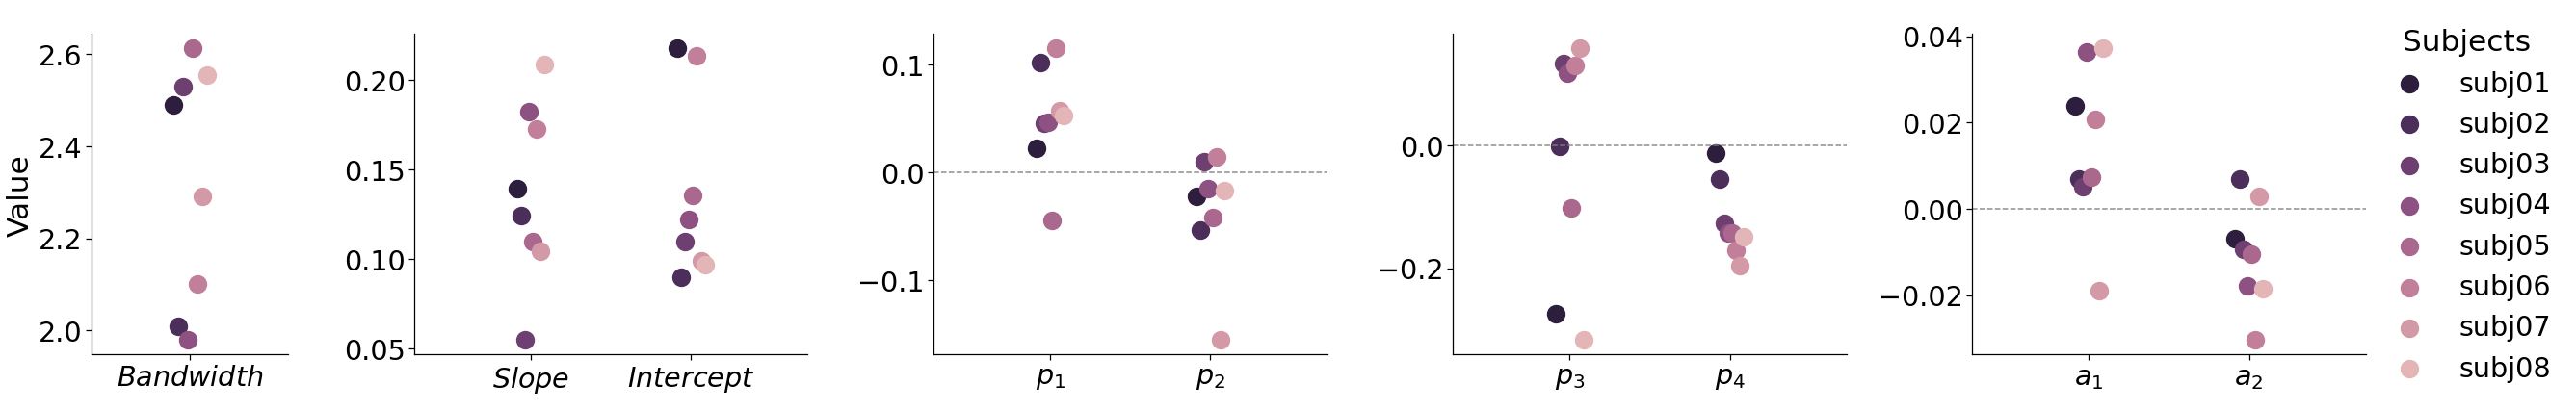

In [83]:
params_list = ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']
group = [1,2,2,3,3,4,4,5,5]
grid = vis2D.plot_precision_weighted_avg_parameters(final_df, params_list, group, hue='sub', lgd_title='Subjects', height=7)

In [105]:
nsd_df = final_df[params_list + ['dset','sub','vroinames']]
all_df = nsd_df.append(final_bd_df)

cur_df = all_df.query('vroinames == "V1"')
cur_df['precision'] = 1

In [108]:
utils.get_colors('dset', ['broderick','nsdsyn'])

[(0.19607843137254902, 0.19607843137254902, 0.19607843137254902),
 (0.34509803921568627, 0.023529411764705882, 0.5607843137254902)]

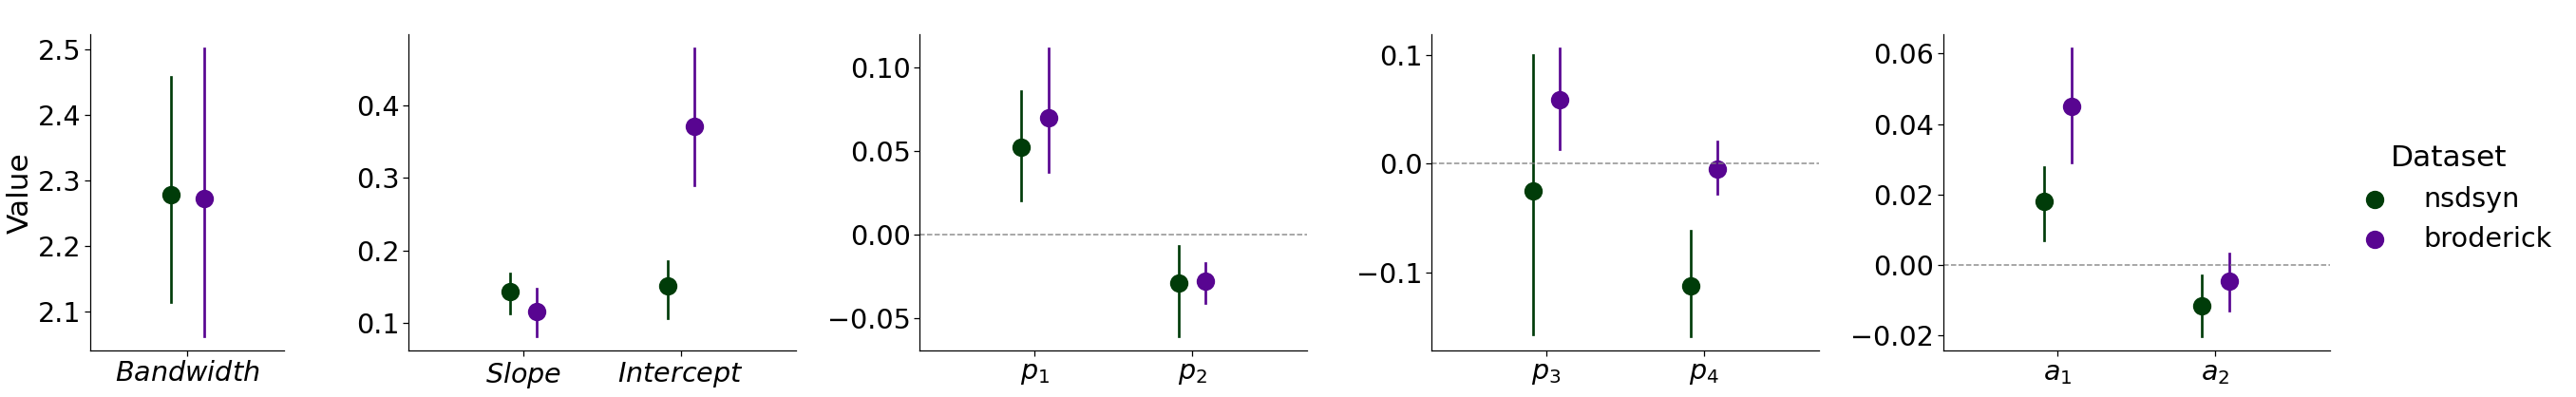

In [154]:
params_list = ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']
group = [1,2,2,3,3,4,4,5,5]
final_df['precision'] = 1 / final_df['sigma_v_squared']
grid = vis2D.plot_precision_weighted_avg_parameters(final_df, params_list, group, hue='dset', hue_order=['nsdsyn', 'broderick'], lgd_title='Dataset', height=7, pal=utils.get_colors('dset', to_plot=['broderick', 'nsdsyn']), save_path='')

In [144]:
a = sns.diverging_palette(130, 300, s=100, l=20, n=2, as_cmap=False)
[k*256 for k in a[1]]

[88.78354477899141, 0.0003217827855209343, 98.97978871726019]

In [119]:
bd_dir = '/Volumes/server/Projects/sfp_nsd/derivatives_old/dataframes/broderick'

for bd_subj in broderick_subj_list:
    tmp = pd.read_csv(os.path.join(bd_dir, f'{bd_subj}_stim_voxel_info_df_vs-pRFsigma_V1_median.csv'))
    new_df = tmp[['subj','voxel','vroinames','sigma_v_squared']].drop_duplicates(subset=['voxel'])
    f_path = precision_v_dir = os.path.join(output_dir, 'dataframes', 'broderick', 'precision', f'precision-v_dset-broderick_{bd_subj}_roi-V1_vs-pRFsize.csv')
    new_df.to_csv(f_path, index=False)

# Color test